In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [13]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
df = pd.DataFrame(data=housing['data'], index=housing['target'], columns=housing['feature_names'])

In [20]:
df.drop('index', axis=1, inplace=True)

In [22]:
df.insert(0, 'PRICE', housing['target'])

In [23]:
df.head()

,PRICE,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [24]:
df.columns

Index(['PRICE', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'],
      dtype='object')

In [25]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude']]

y = df['PRICE']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [31]:
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
lm.intercept_

-37.40788318382114

In [33]:
lm.coef_

array([ 4.31998909e-01,  9.47550922e-03, -9.73916781e-02,  5.78556285e-01,
       -4.00661914e-06, -3.22416101e-03, -4.25744434e-01, -4.40009392e-01])

In [34]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [35]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [36]:
cdf

,Coeff
MedInc,0.431999
HouseAge,0.009476
AveRooms,-0.097392
AveBedrms,0.578556
Population,-0.000004
AveOccup,-0.003224
Latitude,-0.425744
Longitude,-0.440009


In [38]:
predictions = lm.predict(X_test)

In [39]:
predictions

array([0.96183937, 1.35614758, 1.00634981, ..., 2.65441438, 3.48285139,
       1.71073987])

In [40]:
y_test

9218     0.52300
12088    1.10000
1032     0.96400
8345     1.86200
18674    2.95200
          ...   
520      2.89900
13190    1.29200
5324     5.00001
3573     4.77200
7537     1.05300
Name: PRICE, Length: 6192, dtype: float64

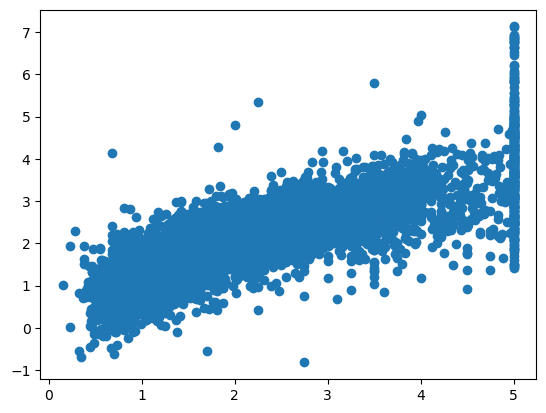

In [41]:
plt.scatter(y_test, predictions)

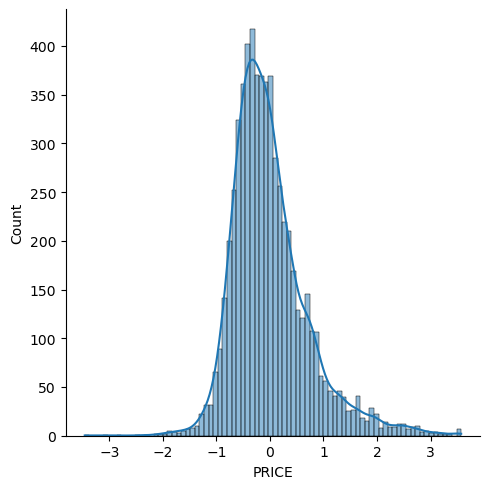

In [43]:
sns.displot((y_test-predictions), kde=True)

In [44]:
from sklearn import metrics

In [45]:
metrics.mean_absolute_error(y_test, predictions)

0.5299206311601473

In [50]:
metrics.mean_squared_error(y_test, predictions)

0.5198161168793826

In [51]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.7209827438152612